In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
if path_parent.endswith("Abaqus-Macromechanics-Project"):
    os.chdir(path_parent) 
    print("Moving up to the parent directory")
    print(os.getcwd())

The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project\notebooks
Moving up to the parent directory
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project


In [3]:
from stage0_configs import *
from modules.MOO_SIM import *
from modules.helper import *
from modules.hardeningLaws import *
info = main_config()

taskName = "A5" # A1 A2 A3 A4

if taskName == "A5":
    info['targetPath'] = "MOO_targets/DP1000_400C_SwiftVoce_curve1"
    info['resultPath'] = "MOO_results/DP1000_400C_SwiftVoce_curve1"
    info['geometries'] = ["NDBR50", "NDBR6","CHD6"]
    info['hardeningLaw'] = "SwiftVoce"


Welcome to the Abaqus parameter calibration project


The configurations you have chosen: 

+------------------------+-------------------+
|     Global Configs     |    User choice    |
+------------------------+-------------------+
|    SLURM iteration     |   one_node_small  |
| Number of initial sims |        200        |
|   Optimize strategy    |        MOO        |
|        Material        |    DP1000_400C    |
|     Hardening law      |     SwiftVoce     |
|      Curve index       |         1         |
|       Geometries       | NDBR50,NDBR6,CHD6 |
|     Optimizer name     |      BOTORCH      |
|   Deviation percent    |         2         |
+------------------------+-------------------+

Generating necessary directories

The path to your main project folder is

c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project



# Initial guess FD curve simulations

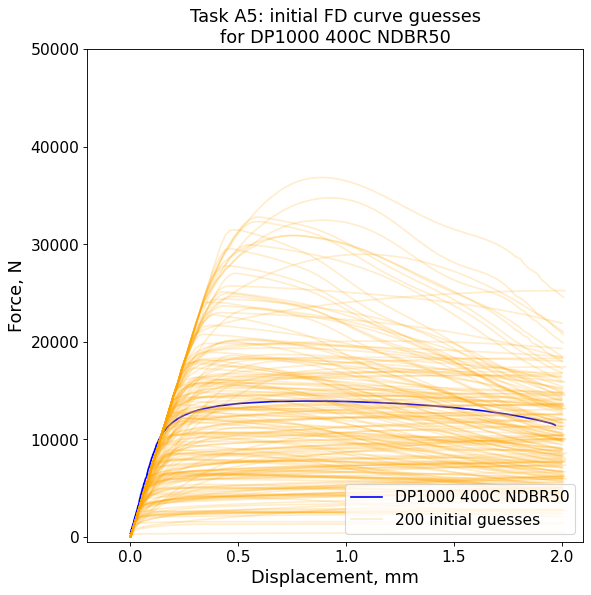

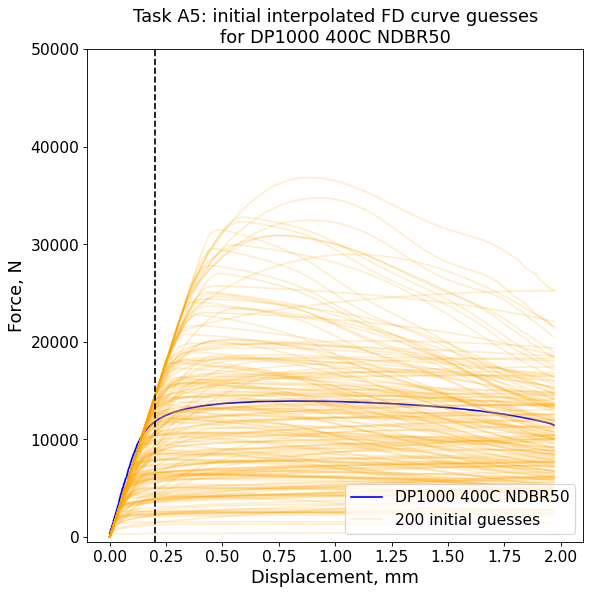

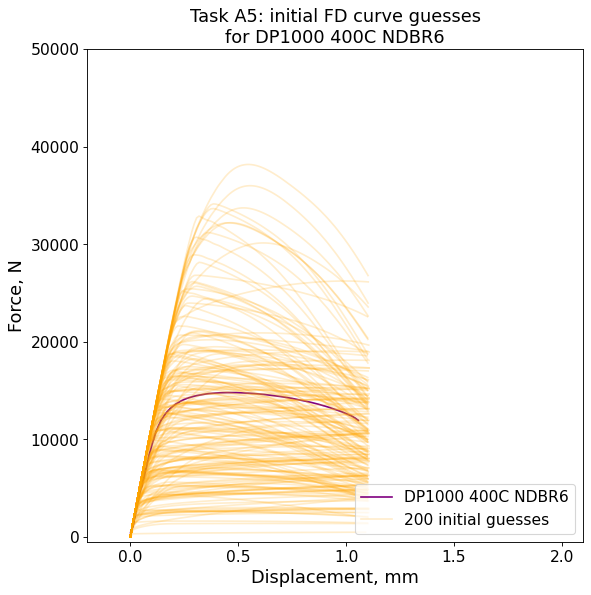

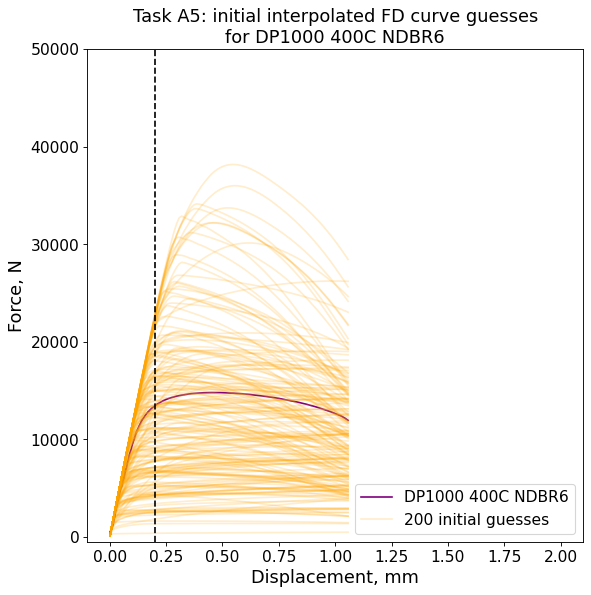

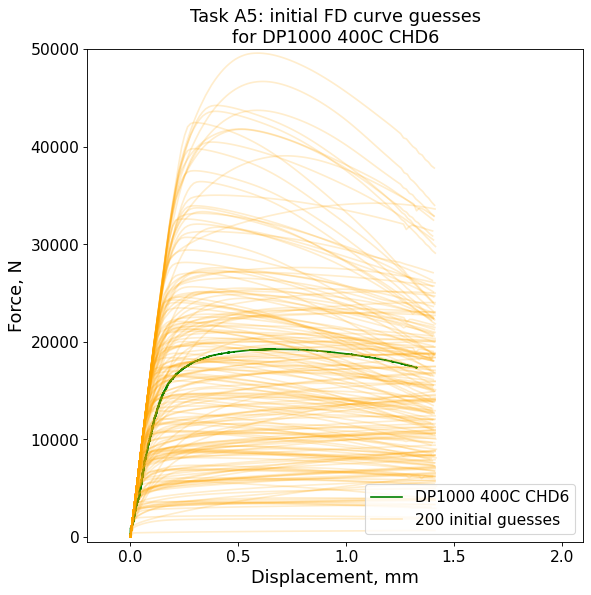

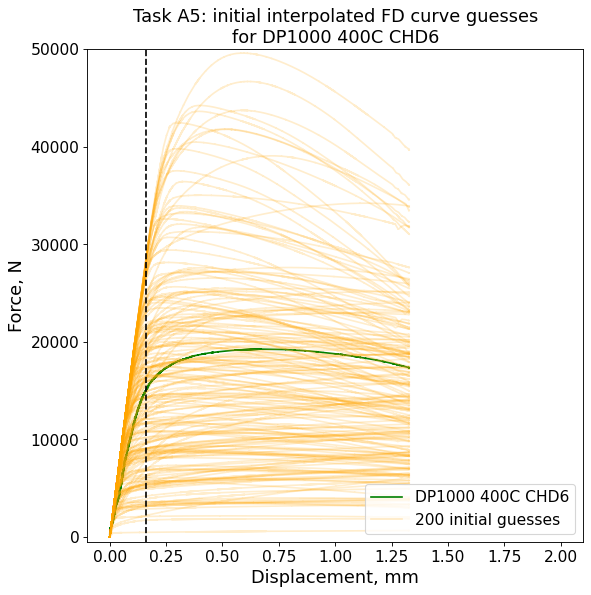

In [22]:
colors = ["blue", "purple", "green"]

for index, geometry in enumerate(info['geometries']):

    resultPath = info['resultPath']
    targetPath = info['targetPath']

    target = pd.read_csv(f"{targetPath}/{geometry}/FD_Curve.csv")
    expForce = target['force/N'].to_numpy()
    expDisplacement = target['displacement/mm'].to_numpy() 

    targetCurve = {}
    targetCurve['displacement'] = expDisplacement
    targetCurve['force'] = expForce

    initial_original_FD_Curves = np.load(f"{resultPath}/{geometry}/initial/common/FD_Curves_smooth.npy", allow_pickle=True).tolist()
    initial_interpolated_FD_Curves = interpolating_FD_Curves(initial_original_FD_Curves, targetCurve)

    fontsize = 14

    figure(figsize=(8, 8), dpi=80)
    plt.plot(expDisplacement, expForce, label=f'DP1000 400C {geometry}', color=colors[index])
    for param in initial_original_FD_Curves:
        plt.plot(initial_original_FD_Curves[param]['displacement'], 
                initial_original_FD_Curves[param]['force'], 
                color='orange', 
                alpha=0.2,
                #label=param
                )
    numberOfInitialSims = len(initial_original_FD_Curves)
    plt.plot([],[], color='orange', alpha=0.2, label=f'{numberOfInitialSims} initial guesses')
    plt.title(f'Task {taskName}: initial FD curve guesses\nfor DP1000 400C {geometry}', fontsize=fontsize+2)
    plt.xlabel('Displacement, mm', fontsize=fontsize+2)
    plt.ylabel('Force, N', fontsize=fontsize+2)
    plt.xlim([-0.2, 2.1])
    plt.ylim([-500, 50000])
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.legend(fontsize=fontsize, loc=4)


    figure(figsize=(8, 8), dpi=80)
    plt.plot(expDisplacement, expForce, label=f'DP1000 400C {geometry}', color=colors[index])
    for param in initial_interpolated_FD_Curves:
        plt.plot(initial_interpolated_FD_Curves[param]['displacement'], 
                initial_interpolated_FD_Curves[param]['force'], 
                color='orange', 
                alpha=0.2,
                #label=param
                )
        
    numberOfInitialSims = len(initial_original_FD_Curves)
    plt.plot([],[], color='orange', alpha=0.2, label=f'{numberOfInitialSims} initial guesses')
    plt.title(f'Task {taskName}: initial interpolated FD curve guesses\nfor DP1000 400C {geometry}', fontsize=fontsize+2)
    plt.xlabel('Displacement, mm', fontsize=fontsize+2)
    plt.ylabel('Force, N', fontsize=fontsize+2)
    plt.xlim([-0.1, 2.1])
    plt.ylim([-500, 50000])
    if geometry == "NDBR50":
        plt.axvline(x=targetCurve['displacement'][200], color='black', linestyle='--')
    if geometry == "NDBR6":
        plt.axvline(x=targetCurve['displacement'][200], color='black', linestyle='--')
    if geometry == "CHD6":
        plt.axvline(x=targetCurve['displacement'][1200], color='black', linestyle='--')
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.legend(fontsize=fontsize, loc=4)
    plt.show()

# Initial guess flow curve simulations

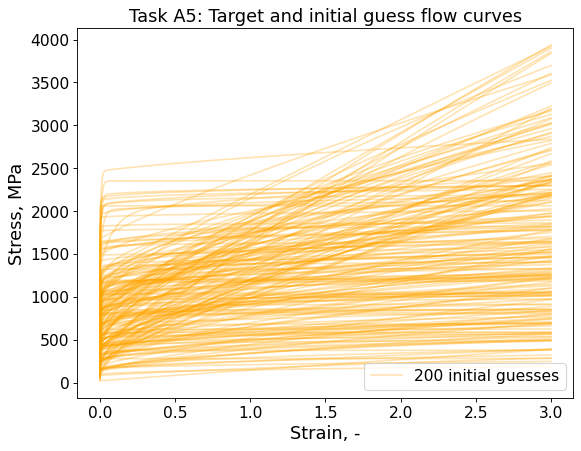

In [5]:
colors = ["blue", "orange", "green"]
geometries = info['geometries']


resultPath = info['resultPath']
targetPath = info['targetPath']

initial_original_flowCurves = np.load(f"{resultPath}/{geometries[0]}/initial/common/flowCurves.npy", allow_pickle=True).tolist()

fontsize = 14

#############################
figure(figsize=(8, 6), dpi=80)
for param in initial_original_flowCurves:
    plt.plot(initial_original_flowCurves[param]['strain'], 
            initial_original_flowCurves[param]['stress'], 
            color='orange', 
            alpha=0.3,
            #label=param
            )
numberOfInitialSims = len(initial_original_flowCurves)
plt.plot([],[], color='orange', alpha=0.3, label=f'{numberOfInitialSims} initial guesses')
plt.title(f'Task {taskName}: Target and initial guess flow curves', fontsize=fontsize+2)
plt.xlabel('Strain, -', fontsize=fontsize+2)
plt.ylabel('Stress, MPa', fontsize=fontsize+2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize, loc=4)
